# üìä ◊°◊ô◊õ◊ï◊ù: ◊©◊í◊ô◊ê◊ï◊™, ◊ó◊®◊ô◊í◊ô◊ù ◊ï◊™◊ú◊ï◊™ ◊ë◊ô◊ü ◊û◊©◊™◊†◊ô◊ù ◊ë◊®◊í◊®◊°◊ô◊î

## 1. ◊™◊ú◊ï◊™ ◊ë◊ô◊ü ◊î◊©◊í◊ô◊ê◊ï◊™ ($Correlation of Error Terms$) ◊ô
◊î◊†◊ó◊™ ◊î◊û◊ï◊ì◊ú ◊î◊ú◊ô◊†◊ô◊ê◊®◊ô ◊î◊ô◊ê ◊©◊î◊©◊í◊ô◊ê◊ï◊™ $ \varepsilon_i $ ◊ê◊ô◊†◊ü ◊™◊ú◊ï◊ô◊ï◊™ ◊ñ◊ï ◊ë◊ñ◊ï.

◊ê◊ù ◊ß◊ô◊ô◊ù **◊û◊™◊ê◊ù ◊ë◊ô◊ü ◊î◊©◊í◊ô◊ê◊ï◊™**, ◊î◊™◊ï◊¶◊ê◊î ◊î◊ô◊ê:
- ◊°◊ò◊ô◊ï◊™ ◊™◊ß◊ü ◊û◊ï◊¢◊®◊õ◊ï◊™ ◊†◊û◊ï◊õ◊ï◊™ ◊û◊î◊ê◊û◊™.
- ◊®◊ï◊ï◊ó◊ô ◊°◊û◊ö ◊¶◊®◊ô◊ù ◊û◊ì◊ô.
- ◊¢◊®◊õ◊ô $ p $ ◊†◊û◊ï◊õ◊ô◊ù ◊û◊ì◊ô.

üìå **◊ë◊ì◊ô◊ß◊î ◊ë◊ê◊û◊¶◊¢◊ï◊™ ◊í◊®◊£ ◊î◊©◊ê◊®◊ô◊ï◊™ ◊ú◊§◊ô ◊ñ◊û◊ü**

In [11]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor, OLSInfluence


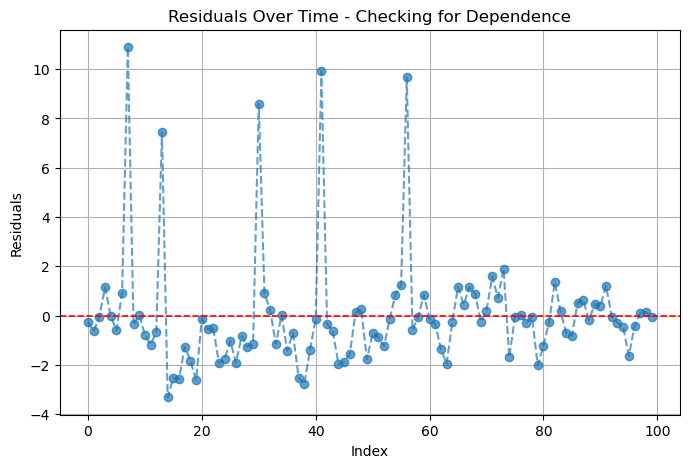

In [23]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import OLSInfluence, variance_inflation_factor

# Set seed for reproducibility
np.random.seed(42)

# ===== Generate Data =====
n = 100
x = np.linspace(0, 10, n)

# Generate correlated errors
errors = np.random.randn(n)
for i in range(1, n):
    errors[i] = 0.5 * errors[i - 1] + errors[i]  # Induce correlation

# Create dependent variable with linear trend
y = 5 + 2 * x + errors

# Introduce artificial outliers (Ensuring Outliers Exist)
outlier_indices = np.random.choice(n, size=5, replace=False)  # Randomly select indices
y[outlier_indices] += np.random.choice([-10, 10], size=5)  # Shift values significantly

# ===== Fit Regression Model =====
X = sm.add_constant(x)  # Add intercept
model = sm.OLS(y, X).fit()
residuals = model.resid

# ===== Residual Plot: Checking for Dependence =====
plt.figure(figsize=(8, 5))
plt.plot(range(n), residuals, marker="o", linestyle="dashed", alpha=0.7)
plt.axhline(y=0, color="red", linestyle="--", linewidth=1.2)
plt.xlabel("Index")
plt.ylabel("Residuals")
plt.title("Residuals Over Time - Checking for Dependence")
plt.grid(True)
plt.show()


## 2. ◊ñ◊ô◊î◊ï◊ô ◊¢◊®◊õ◊ô◊ù ◊ó◊®◊ô◊í◊ô◊ù ($Outliers$) ◊ô 
**◊¢◊®◊ö ◊ó◊®◊ô◊í ($Outlier$)** ◊î◊ï◊ê ◊†◊ß◊ï◊ì◊î ◊©◊ë◊î $ y_i $ ◊®◊ó◊ï◊ß ◊û◊ê◊ï◊ì ◊û◊î◊¢◊®◊ö ◊î◊ó◊ñ◊ï◊ô ◊¢◊ú ◊ô◊ì◊ô ◊î◊û◊ï◊ì◊ú.

üí° **◊ñ◊ô◊î◊ï◊ô ◊ë◊ê◊û◊¶◊¢◊ï◊™ ◊©◊ê◊®◊ô◊ï◊™ ◊°◊ò◊ï◊ì◊†◊ò◊ô◊ï◊™:**  
- ◊¢◊®◊õ◊ô◊ù ◊©◊í◊ì◊ï◊ú◊ô◊ù ◊û-$ \pm3 $ ◊†◊ó◊©◊ë◊ô◊ù ◊ó◊®◊ô◊í◊ô◊ù.

Injected Outlier Indices: [30 56 13 41  7]
Detected Outlier Indices: [ 7 13 30 41 56]
Outlier Values (x, y): [(np.float64(0.7070707070707071), np.float64(18.000528972426054)), (np.float64(1.3131313131313131), np.float64(15.703630101155577)), (np.float64(3.0303030303030303), np.float64(20.122008777345542)), (np.float64(4.141414141414141), np.float64(23.5752124824439)), (np.float64(5.656565656565657), np.float64(26.212921643675475))]


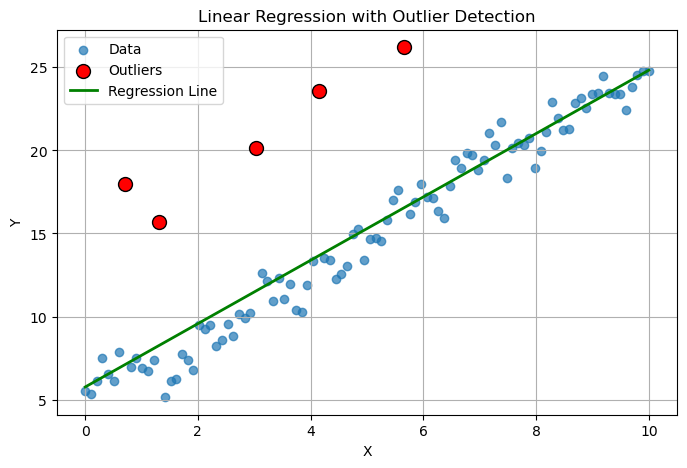

In [24]:

# ===== Studentized Residuals & Outliers =====
influence = OLSInfluence(model)
student_resid = influence.resid_studentized_external

# Identify outliers (Studentized Residual > 3)
outliers = np.where(np.abs(student_resid) > 3)[0]

# Print outlier details
print("Injected Outlier Indices:", outlier_indices)
print("Detected Outlier Indices:", outliers)
print("Outlier Values (x, y):", list(zip(x[outliers], y[outliers])))

# Plot Outliers
plt.figure(figsize=(8, 5))
plt.scatter(x, y, label="Data", alpha=0.7)
plt.scatter(x[outliers], y[outliers], color='red', edgecolors='black', s=100, label="Outliers", zorder=3)
plt.plot(x, model.predict(X), color='green', linewidth=2, label="Regression Line")

# Labels and Legend
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Linear Regression with Outlier Detection")
plt.legend()
plt.grid(True)
plt.show()



## 3. ◊†◊ß◊ï◊ì◊ï◊™ ◊ë◊¢◊ú◊ï◊™ ◊î◊©◊§◊¢◊î ◊í◊ë◊ï◊î◊î (High-Leverage Points)
**◊†◊ß◊ï◊ì◊î ◊ë◊¢◊ú◊™ ◊î◊©◊§◊¢◊î ◊í◊ë◊ï◊î◊î** ◊î◊ô◊ê ◊™◊¶◊§◊ô◊™ ◊¢◊ù ◊¢◊®◊ö ◊ó◊®◊ô◊í ◊©◊ú ◊û◊©◊™◊†◊î ◊ë◊ú◊™◊ô ◊™◊ú◊ï◊ô.

üí° **◊ó◊ô◊©◊ï◊ë ◊°◊ò◊ò◊ô◊°◊ò◊ô◊ß◊™ ◊î◊î◊©◊§◊¢◊î (Leverage):** 
- ◊ê◊ù $ h_i > \frac{2p}{n} $, ◊ô◊© ◊ú◊ë◊ì◊ï◊ß ◊ê◊™ ◊î◊©◊§◊¢◊™ ◊î◊™◊¶◊§◊ô◊™.

Indices of High Leverage Points: []


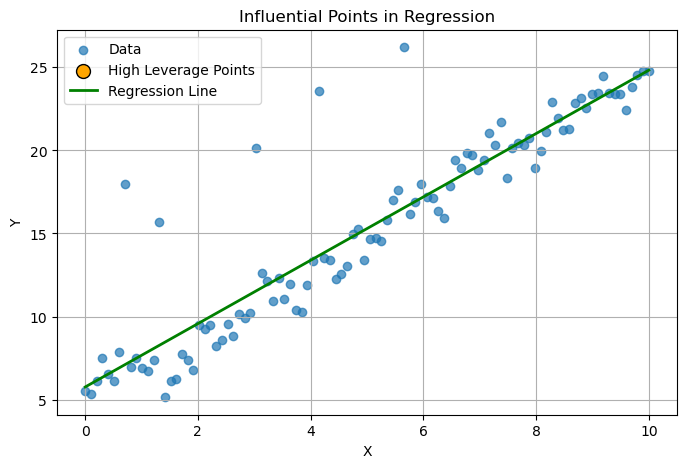

In [25]:

# ===== Leverage Statistics (Influential Points) =====
leverage = influence.hat_matrix_diag
high_leverage = np.where(leverage > 2 * X.shape[1] / len(y))[0]

# Print high leverage points
print("Indices of High Leverage Points:", high_leverage)

# Plot High Leverage Points
plt.figure(figsize=(8, 5))
plt.scatter(x, y, label="Data", alpha=0.7)
plt.scatter(x[high_leverage], y[high_leverage], color='orange', edgecolors='black', s=100, label="High Leverage Points")
plt.plot(x, model.predict(X), color='green', linewidth=2, label="Regression Line")

# Labels and Legend
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Influential Points in Regression")
plt.legend()
plt.grid(True)
plt.show()


## 4. ◊ß◊ï◊ú◊ô◊†◊ê◊®◊ô◊ï◊™ ◊ï◊û◊ï◊ú◊ò◊ô◊ß◊ï◊ú◊ô◊†◊ê◊®◊ô◊ï◊™ (Collinearity & Multicollinearity)
**◊ß◊ï◊ú◊ô◊†◊ê◊®◊ô◊ï◊™** ◊û◊™◊®◊ó◊©◊™ ◊õ◊ê◊©◊® ◊©◊†◊ô ◊û◊©◊™◊†◊ô◊ù ◊ë◊ú◊™◊ô ◊™◊ú◊ï◊ô◊ô◊ù ◊ß◊©◊ï◊®◊ô◊ù ◊ñ◊î ◊ú◊ñ◊î.

üí° **◊ñ◊ô◊î◊ï◊ô ◊ë◊ê◊û◊¶◊¢◊ï◊™ ◊û◊ò◊®◊ô◊¶◊™ ◊û◊™◊ê◊ù:**

In [18]:

# ===== Multicollinearity Check using VIF =====
# Generate Multicollinear Data
X1 = np.random.rand(100) * 10
X2 = X1 + np.random.randn(100) * 0.5  # Strong correlation with X1
X3 = np.random.rand(100) * 10
df = pd.DataFrame({'X1': X1, 'X2': X2, 'X3': X3})

# Compute Correlation Matrix
corr_matrix = df.corr()
print("\nCorrelation Matrix:\n", corr_matrix)


          X1        X2        X3
X1  1.000000  0.989389  0.086594
X2  0.989389  1.000000  0.054716
X3  0.086594  0.054716  1.000000


## 5. ◊û◊ï◊ú◊ò◊ô◊ß◊ï◊ú◊ô◊†◊ê◊®◊ô◊ï◊™ ◊ï◊í◊ï◊®◊ù ◊†◊ô◊§◊ï◊ó ◊©◊ï◊†◊ï◊™ (VIF)
**◊û◊ï◊ú◊ò◊ô◊ß◊ï◊ú◊ô◊†◊ê◊®◊ô◊ï◊™** ◊î◊ô◊ê ◊û◊¶◊ë ◊ë◊ï ◊©◊ú◊ï◊©◊î ◊ê◊ï ◊ô◊ï◊™◊® ◊û◊©◊™◊†◊ô◊ù ◊ë◊ú◊™◊ô ◊™◊ú◊ï◊ô◊ô◊ù ◊ß◊©◊ï◊®◊ô◊ù ◊ñ◊î ◊ú◊ñ◊î.

üí° **◊û◊ì◊ô◊ì◊™ ◊î◊û◊ï◊ú◊ò◊ô◊ß◊ï◊ú◊ô◊†◊ê◊®◊ô◊ï◊™ ◊¢◊ù VIF**:
$$[ VIF_j = \frac{1}{1 - R^2_{X_j | X_{-j}}} ]$$

- $ VIF > 10 $ ‚Üí ◊î◊û◊ï◊ú◊ò◊ô◊ß◊ï◊ú◊ô◊†◊ê◊®◊ô◊ï◊™ ◊ó◊ñ◊ß◊î ◊ï◊ô◊© ◊ú◊î◊°◊ô◊® ◊û◊©◊™◊†◊ô◊ù.

In [26]:

# Compute VIF for Each Variable
X_multi = np.column_stack((X1, X2, X3))
X_multi_with_const = sm.add_constant(X_multi)
vif = [variance_inflation_factor(X_multi_with_const, i) for i in range(X_multi_with_const.shape[1])]

# Display VIF Results
variables = ['Constant', 'X1', 'X2', 'X3']
print("\nVariance Inflation Factor (VIF):")
for var, val in zip(variables, vif):
    print(f'VIF for {var}: {val:.2f}')

# Interpretation
print("\nüîç **VIF Interpretation**:")
print("- If VIF > 10 ‚Üí Strong multicollinearity, problematic for regression.")
print("- If 5 < VIF < 10 ‚Üí Moderate multicollinearity, should be examined.")
print("- If VIF < 5 ‚Üí Low multicollinearity, acceptable.")



Variance Inflation Factor (VIF):
VIF for Constant: 7.38
VIF for X1: 49.87
VIF for X2: 49.64
VIF for X3: 1.06

üîç **VIF Interpretation**:
- If VIF > 10 ‚Üí Strong multicollinearity, problematic for regression.
- If 5 < VIF < 10 ‚Üí Moderate multicollinearity, should be examined.
- If VIF < 5 ‚Üí Low multicollinearity, acceptable.


## üìå ◊°◊ô◊õ◊ï◊ù
‚úî **◊™◊ú◊ï◊™ ◊ë◊©◊í◊ô◊ê◊ï◊™** ◊ô◊õ◊ï◊ú◊î ◊ú◊í◊®◊ï◊ù ◊ú◊î◊¢◊®◊õ◊™ ◊ô◊™◊® ◊©◊ú ◊û◊ï◊ë◊î◊ß◊ï◊™ ◊î◊û◊ï◊ì◊ú.  
‚úî **◊ó◊®◊ô◊í◊ô◊ù ◊ï◊†◊ß◊ï◊ì◊ï◊™ ◊ë◊¢◊ú◊ï◊™ ◊î◊©◊§◊¢◊î ◊í◊ë◊ï◊î◊î** ◊ô◊õ◊ï◊ú◊ô◊ù ◊ú◊¢◊ï◊ï◊™ ◊ê◊™ ◊ß◊ï ◊î◊®◊í◊®◊°◊ô◊î.  
‚úî **◊ß◊ï◊ú◊ô◊†◊ê◊®◊ô◊ï◊™ ◊ï◊û◊ï◊ú◊ò◊ô◊ß◊ï◊ú◊ô◊†◊ê◊®◊ô◊ï◊™** ◊¢◊ú◊ï◊ú◊ï◊™ ◊ú◊§◊í◊ï◊¢
◊ß◊ï◊ú◊ô◊†◊ê◊®◊ô◊ï◊™ ◊ï◊û◊ï◊ú◊ò◊ô◊ß◊ï◊ú◊ô◊†◊ê◊®◊ô◊ï◊™ ◊¢◊ú◊ï◊ú◊ï◊™ ◊ú◊§◊í◊ï◊¢ ◊ë◊ì◊ô◊ï◊ß ◊î◊û◊ï◊ì◊ú.
‚úî ◊ó◊ô◊©◊ï◊ë $VIF$ ◊û◊°◊ô◊ô◊¢ ◊ë◊ñ◊ô◊î◊ï◊ô ◊û◊©◊™◊†◊ô◊ù ◊ë◊¢◊ô◊ô◊™◊ô◊ô◊ù.

üìå ◊ë◊ô◊¶◊ï◊¢ ◊ë◊ì◊ô◊ß◊ï◊™ ◊ê◊ú◊ï ◊ô◊°◊ô◊ô◊¢ ◊ú◊ö ◊ú◊ë◊†◊ï◊™ ◊û◊ï◊ì◊ú◊ô◊ù ◊ó◊ñ◊ß◊ô◊ù ◊ï◊û◊ì◊ï◊ô◊ß◊ô◊ù ◊ô◊ï◊™◊®! üöÄ
